<a href="https://colab.research.google.com/github/kashish049/water-quality-fluctuation-prediction/blob/main/water_quality_fluctuation_prediction(best_model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import trim_mean

In [8]:
# Load the dataset
data = pd.read_csv('dataset1.csv',encoding='ISO-8859-1')

# Display basic info about the dataset
print("Initial Dataset Info:\n", data.info())
print("\nInitial Data Preview:\n", data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

In [9]:
# Step 1: Convert specific columns to numeric, handling non-numeric values by coercing them to NaN
numeric_columns = [
    'Temp', 'D.O. (mg/l)', 'PH', 'CONDUCTIVITY (µmhos/cm)',
    'B.O.D. (mg/l)', 'NITRATENAN N+ NITRITENANN (mg/l)',
    'FECAL COLIFORM (MPN/100ml)', 'TOTAL COLIFORM (MPN/100ml)Mean'
]

for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [10]:
# Step 2: Fill NaN values in numeric columns with the mean of each column
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Confirm data types after conversion and NaN handling
print("\nData types after conversion and NaN handling:\n", data.dtypes)


Data types after conversion and NaN handling:
 STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)          float64
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object


In [11]:
# Step 3: Descriptive Statistics after cleaning
print("\nDescriptive Statistics after cleaning:\n", data.describe())


Descriptive Statistics after cleaning:
               Temp  D.O. (mg/l)            PH  CONDUCTIVITY (µmhos/cm)  \
count  1991.000000  1991.000000   1991.000000              1991.000000   
mean     26.209814     6.392637    112.090674              1786.466394   
std       3.287652     1.322515   1875.150167              5517.289887   
min      10.000000     0.000000      0.000000                 0.400000   
25%      25.000000     5.950000      6.900000                79.000000   
50%      27.000000     6.700000      7.300000               187.630000   
75%      28.300000     7.200000      7.700000               620.500000   
max      35.000000    11.400000  67115.000000             65700.000000   

       B.O.D. (mg/l)  NITRATENAN N+ NITRITENANN (mg/l)  \
count    1991.000000                       1991.000000   
mean        6.940049                          1.623079   
std        29.080653                          3.852301   
min         0.100000                          0.000000   
25

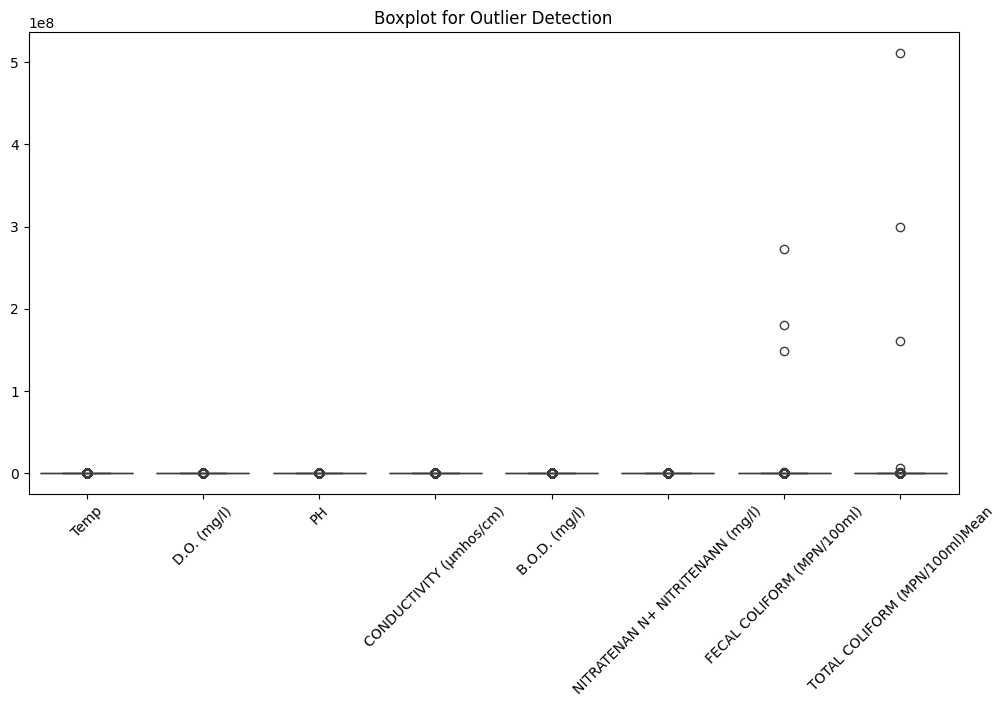

In [12]:
# Step 4: Outlier Detection and Removal
# Checking for outliers using boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numeric_columns])
plt.title('Boxplot for Outlier Detection')
plt.xticks(rotation=45)
plt.show()

# Removing outliers based on the IQR method
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    # Filtering out values that fall outside 1.5*IQR
    data = data[(data[col] >= Q1 - 1.5 * IQR) & (data[col] <= Q3 + 1.5 * IQR)]

In [13]:
# Step 5: Re-check Descriptive Statistics and Dataset Balance
print("\nDescriptive Statistics after outlier removal:\n", data.describe())


Descriptive Statistics after outlier removal:
              Temp  D.O. (mg/l)          PH  CONDUCTIVITY (µmhos/cm)  \
count  854.000000   854.000000  854.000000               854.000000   
mean    27.085701     6.704269    7.146457               180.173302   
std      1.941704     0.668525    0.524847               184.349396   
min     20.300000     4.400000    5.800000                11.000000   
25%     26.000000     6.400000    6.800000                68.250000   
50%     27.300000     6.800000    7.122500               111.000000   
75%     28.300000     7.100000    7.600000               212.000000   
max     33.000000     8.600000    8.310000              1190.000000   

       B.O.D. (mg/l)  NITRATENAN N+ NITRITENANN (mg/l)  \
count     854.000000                        854.000000   
mean        1.818907                          0.504821   
std         1.191820                          0.437518   
min         0.100000                          0.000000   
25%         0.900000  

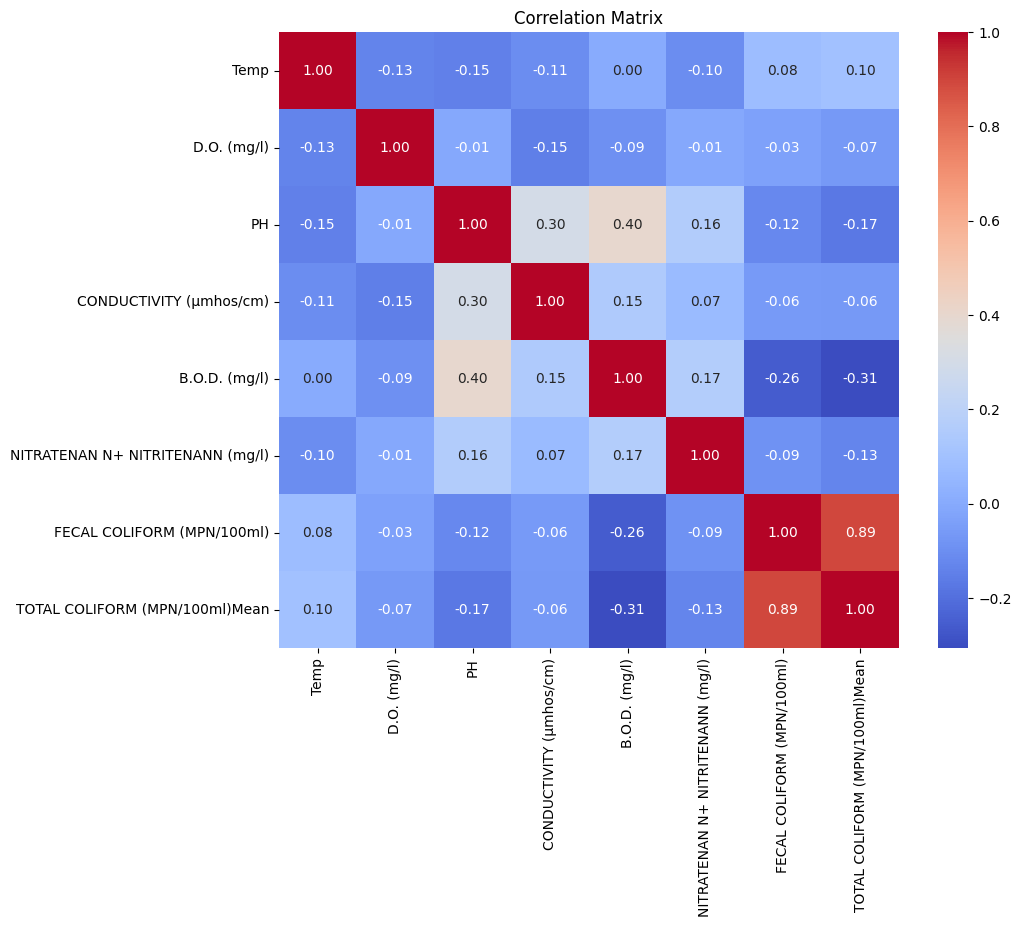

In [14]:
# Step 6: Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [16]:
# Step 7: Define X (features) and y (target)
# Assuming 'target' is the prediction target column
if 'target' not in data.columns:
    data['target'] = data['PH']  # Example: If PH is target, change as needed
X = data[numeric_columns]
y = data['target']

# Define different train-test splits
splits = [(0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2)]
results = []

# Define models based on the research paper, updating for the estimator parameter
models = {
    "Bagging Decision Tree": BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42),
    "Stochastic Weighted Bagging": BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42, max_samples=0.5, max_features=0.5),
    "Linear Regression": LinearRegression(),
    "Support Vector Machine": SVR(),
    "Multi-Layer Perceptron": MLPRegressor(max_iter=500, random_state=42)
}

In [17]:
# Step 8: Model Training, Evaluation, and Storing Results
for train_size, test_size in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        # Predict on test set
        y_pred = model.predict(X_test)

        # Evaluate performance
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        # Collect results
        results.append({
            "Model": model_name,
            "Train-Test Split": f"{int(train_size*100)}-{int(test_size*100)}",
            "R² Score": r2,
            "MAE": mae,
            "RMSE": rmse
        })

# Convert results to a DataFrame for better visualization and output
results_df = pd.DataFrame(results)

In [18]:
# Display the results
print("\nModel Performance Results:\n", results_df)


Model Performance Results:
                           Model Train-Test Split  R² Score           MAE  \
0         Bagging Decision Tree            50-50  0.999402  4.804450e-03   
1   Stochastic Weighted Bagging            50-50  0.748367  2.158897e-01   
2             Linear Regression            50-50  1.000000  2.264751e-14   
3        Support Vector Machine            50-50  0.169636  3.986091e-01   
4        Multi-Layer Perceptron            50-50 -4.325997  7.095227e-01   
5         Bagging Decision Tree            60-40  0.999350  4.440643e-03   
6   Stochastic Weighted Bagging            60-40  0.765148  2.154529e-01   
7             Linear Regression            60-40  1.000000  6.022733e-14   
8        Support Vector Machine            60-40  0.166405  4.091404e-01   
9        Multi-Layer Perceptron            60-40 -2.845279  5.671226e-01   
10        Bagging Decision Tree            70-30  0.999797  2.624903e-03   
11  Stochastic Weighted Bagging            70-30  0.746709 

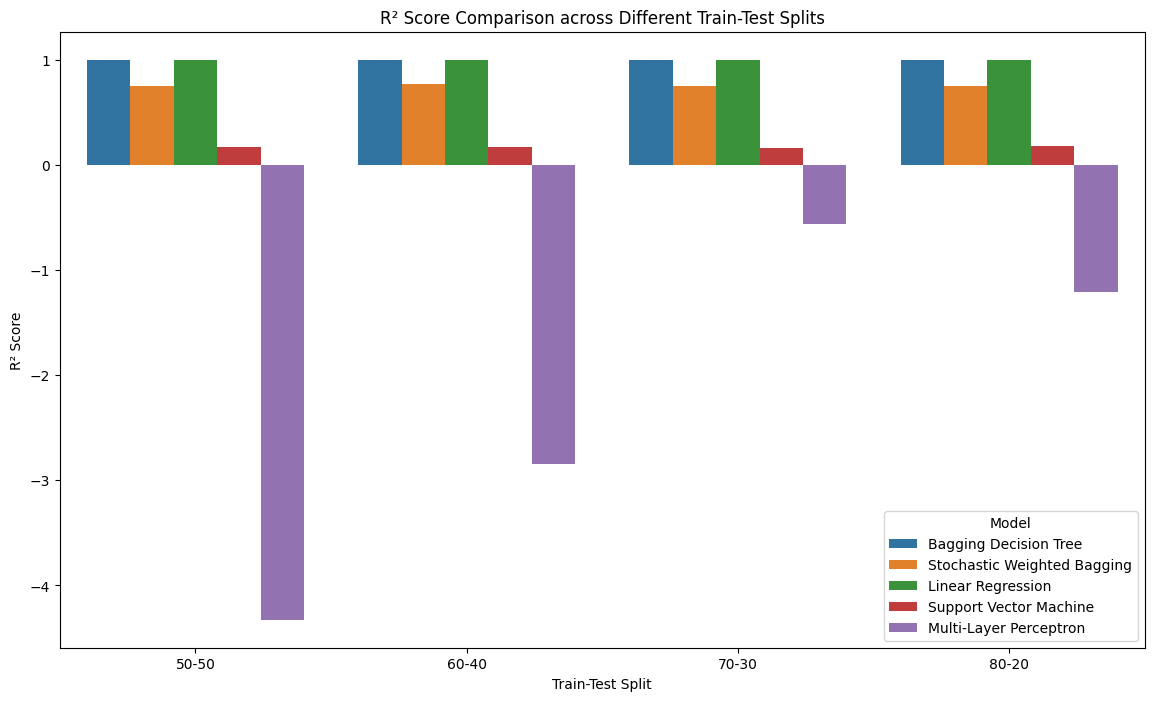

In [19]:
# Step 9: Visualizing the Results
plt.figure(figsize=(14, 8))
sns.barplot(x="Train-Test Split", y="R² Score", hue="Model", data=results_df)
plt.title("R² Score Comparison across Different Train-Test Splits")
plt.show()

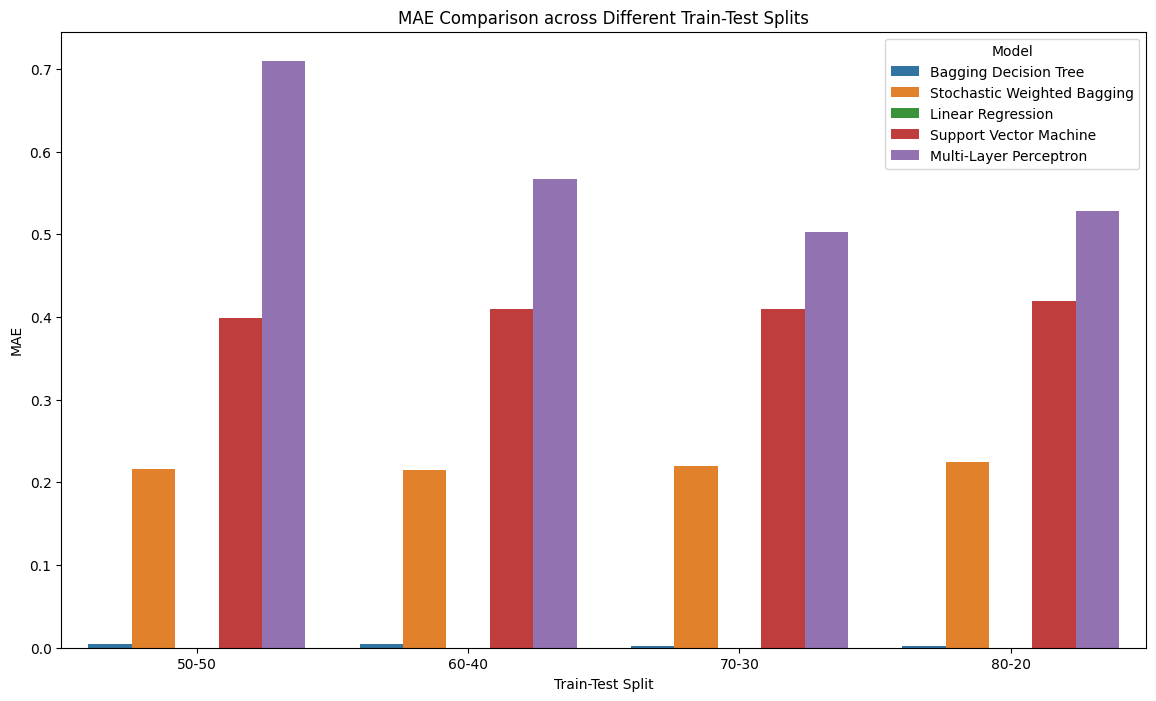

In [20]:
plt.figure(figsize=(14, 8))
sns.barplot(x="Train-Test Split", y="MAE", hue="Model", data=results_df)
plt.title("MAE Comparison across Different Train-Test Splits")
plt.show()

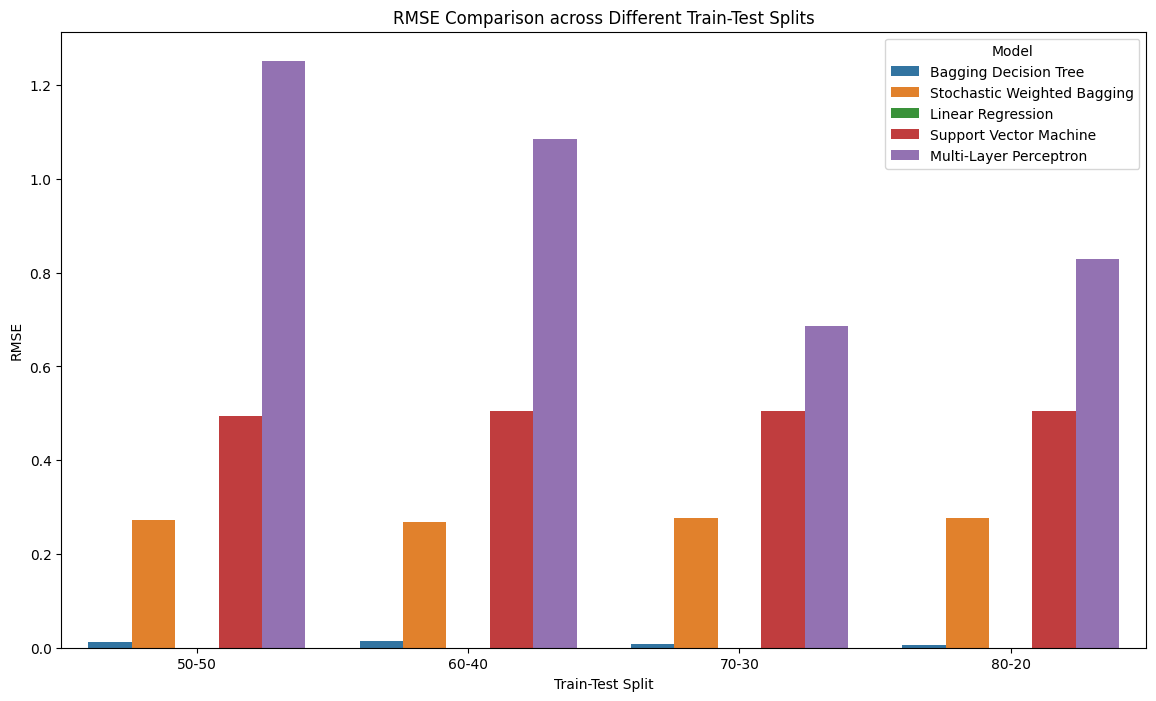

In [21]:
plt.figure(figsize=(14, 8))
sns.barplot(x="Train-Test Split", y="RMSE", hue="Model", data=results_df)
plt.title("RMSE Comparison across Different Train-Test Splits")
plt.show()

In [22]:
# Save results to a CSV file for documentation
results_df.to_csv("model_performance_results.csv", index=False)
print("Results saved to model_performance_results.csv")

Results saved to model_performance_results.csv
